In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [3]:
import time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data = (X_test, y_test))

print('fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2362 - accuracy: 0.9237 - val_loss: 0.0374 - val_accuracy: 0.9871
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.0309 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0360 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0247 - accuracy: 0.9918 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0297 - val_accuracy: 0.9905
fit time :  247.31444001197815


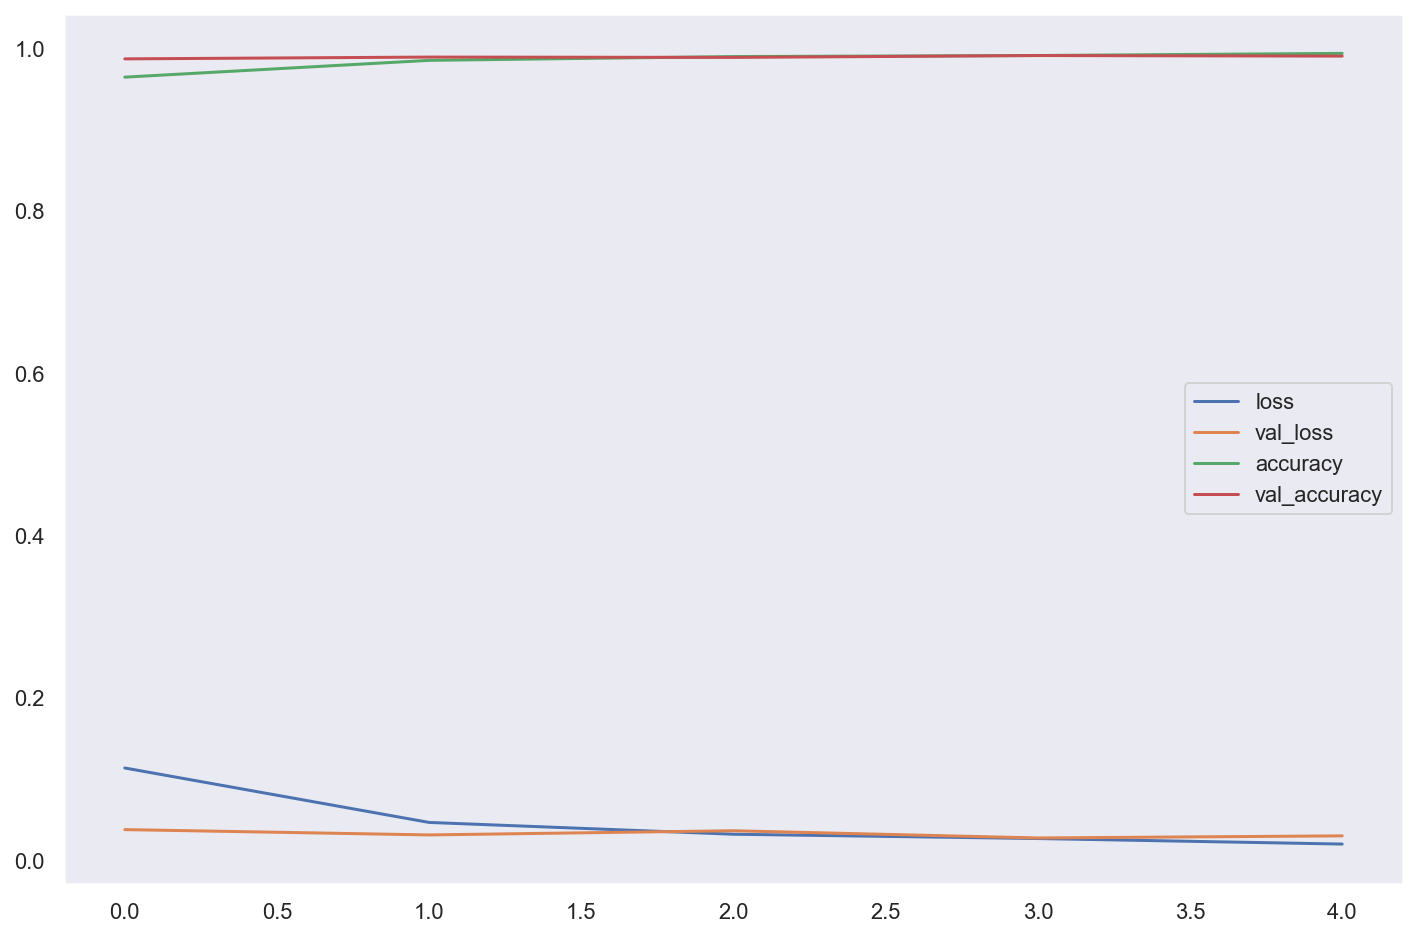

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [5]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0297 - accuracy: 0.9905
Test loss :  0.029709860682487488
Test accuracy :  0.9904999732971191


In [6]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [7]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

95

In [8]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[7899,
 938,
 4783,
 6598,
 2182,
 151,
 3762,
 1247,
 1226,
 1242,
 3520,
 6755,
 3534,
 3727,
 2053,
 3558]

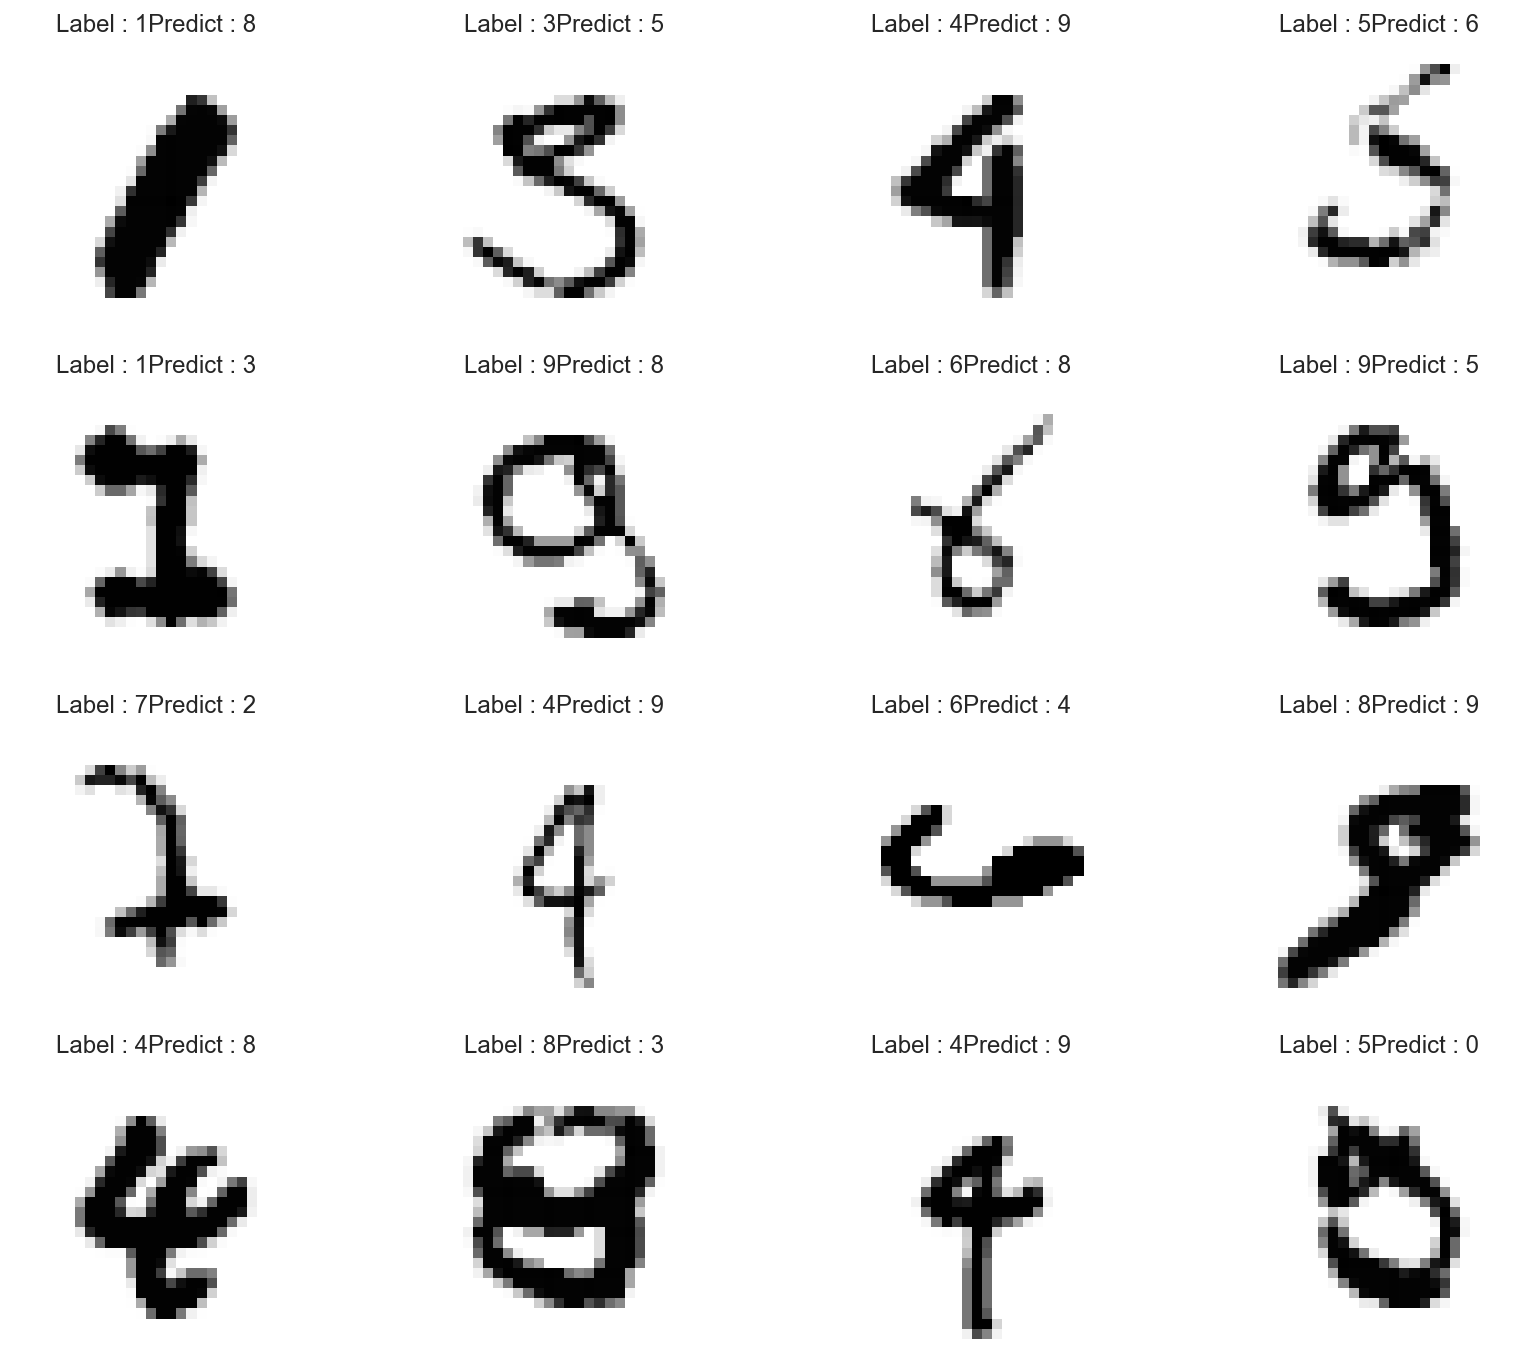

In [9]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

In [10]:
model.save('MNIST_CNN_model.h5')

In [11]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [12]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 6.0527 - accuracy: 0.0808
Test loss :  6.05273962020874
Test accuracy :  0.08079999685287476
